<a href="https://colab.research.google.com/github/SebastianYanezV/ADA-Informes/blob/main/Informe_3_MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema: Problema del sub arreglo máximo

**Entrada:** Arreglo de "n" números $[a_1,a_n]$.

**Salida:** Sub-arreglo $[a_i,..,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.

El problema que se requiere resolver en este caso es el problema del sub arreglo máximo, problema en el que el objetivo es encontrar un sub arreglo contiguo $[a_i,..,a_j]$ dentro del arreglo $[a_1,a_n]$ que maximice la suma de sus elementos. Debido a lo anterior, se puede saber que este problema es uno de optimización ya que se busca el "mejor caso".

Algunas aplicaciones para el problema:

- Venta de acciones: si se supieran los valores del cierre de las acciones de una empresa X en la bolsa durante las semanas a futuro, se podría utilizar este algoritmo para saber cuando comprar y cuando vender para poder maximizar las ganancias. 
- Máxima verosimilitud: este método busca determinar valores para los parámetros de un modelo, de tal manera que esos valores maximicen la probabilidad de que el proceso descrito por el modelo produzca los datos que realmente se observaron. Este método se usa en una gran cantidad de modelos estadísticos.

# 2. MaxSubArray

## 2.1 Código

El código que se muestra a continuación pertenece al algoritmo *MaxSubArray*, el cual contiene las funciones *MaxSubArrayMid* y *MaxSubArray*.

In [111]:
def maxSubArrayMid(A, low, medio, high, verbose = False):
  suma = 0
  sumaIzquierda = -1000
  
  #Se recorre el sub arreglo izquierdo
  for i in range(medio, low - 1, -1):
    suma = suma + A[i]
    if (suma > sumaIzquierda):
      sumaIzquierda = suma
      #Si la suma aumenta, se actualiza el índice low del sub arreglo
      lowAux = i

  suma = 0
  sumaDerecha = -1000

  #Se recorre el sub arreglo derecho
  for j in range(medio, high + 1):
    suma = suma + A[j]
    if (suma > sumaDerecha):
      sumaDerecha = suma
      #Si la suma aumenta, se actualiza el índice high del sub arreglo
      highAux = j

  return max(sumaIzquierda + sumaDerecha - A[medio], sumaIzquierda, sumaDerecha), lowAux, highAux

def maxSubArray(A, low, high, verbose = False):
  if verbose == True: print("Arreglo con el que se está trabajando:", A[low:high + 1])

  #Si el índice low es mayor que el high, se retorna -1 ya que esto no debería pasar
  if (low > high): return -1, low, high
  #Al llegar a un sub arreglo de tamaño 1 se retorna el único elemento que este tiene
  if (low == high): 
    if verbose == True: print("El arreglo se retorna ya que es de largo 1.")
    return A[0], low, high
  
  #Se hacen las llamadas recursivas del algoritmo
  sumaI, lowI, highI = maxSubArray(A, low, ((low + high) // 2))
  sumaD, lowD, highD = maxSubArray(A, ((low + high) // 2) + 1, high)
  sumaMid, lowMid, highMid = maxSubArrayMid(A, low, ((low + high) // 2), high)

  if verbose == True: print("Arreglo izquierdo:", A[lowI:highI + 1],", Suma izquierda:", sumaI)
  if verbose == True: print("Arreglo derecho:", A[lowD:highD + 1],", Suma derecha:", sumaD)
  if verbose == True: print("Arreglo medio:", A[lowMid:highMid + 1],", Suma medio:", sumaMid)

  #Se calcula cuál es la suma máxima y luego se retorna
  if (max(sumaD, sumaI, sumaMid) == sumaD):
    if verbose == True: print("Suma máxima retornada:", sumaD)
    if verbose == True: print("------------------------------------------------------------")
    return sumaD, lowD, highD
  if (max(sumaD, sumaI, sumaMid) == sumaI):
    if verbose == True: print("Suma máxima retornada:", sumaI)
    if verbose == True: print("------------------------------------------------------------")
    return sumaI, lowI, highI

  if verbose == True: print("Suma máxima retornada:", sumaMid)
  if verbose == True: print("------------------------------------------------------------")
  return sumaMid, lowMid, highMid

#Ejemplo
A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
largo = len(A)
maximo, i, j = maxSubArray(A, 0, largo - 1)
print("Arreglo original:", A)
print("Sub arreglo que maximiza la suma:", A[i:j + 1])
print("Indices inicial y final del sub arreglo respectivamente:", i, "y", j)
print("Suma máxima del arreglo:", maximo)

Arreglo original: [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
Sub arreglo que maximiza la suma: [18, 20, -7, 12]
Indices inicial y final del sub arreglo respectivamente: 7 y 10
Suma máxima del arreglo: 43


## 2.2 Descripción del algoritmo

Antes de empezar a buscar el máximo sub arreglo, el algoritmo recibe un arreglo de "n" elementos.

En primer lugar se llama a la función *maxSubArray*:

1. La función se encarga de buscar recursivamente al sub arreglo que maximiza la suma de los elementos del arreglo $[a_1,a_n]$. Esto lo hace dividiendo cada vez al arreglo en dos.

2. La función deja de hacer llamadas recursivas al momento en el que los arreglos generados son de tamaño 1.

3. Finalmente, la función se encarga de retornar el valor máximo entre el sub arreglo izquierdo, el derecho y el que pasa por el punto medio, por lo que primero necesita llamar a la función *maxSubArrayMid* para encontrar al sub arreglo que maximiza la suma pasando por el punto medio del arreglo $[a_1,a_n]$.

Funcionamiento de la función *maxSubArrayMid*:

1. La función se encarga de buscar el sub arreglo de la primera mitad del arreglo $[a_1,a_n]$ que maximice la suma de sus elementos.

2. Luego la función se encarga de hacer el paso anterior, pero ahora para la mitad derecha del arreglo $[a_1,a_n]$.

3. Los pasos anteriores los realiza al ir sumando cada elemento del sub arreglo correspondiente, esto para ir guardando la mayor suma de cada uno.

4. Finalmente retorna el valor máximo entre la suma del sub arreglo izquierdo, el sub arreglo derecho, y el sub arreglo que pasa entre medio.

Luego, los pasos anteriormente descritos se realizan recursivamente (la función *maxSubArray* es la recursiva, no la función *maxSubarrayMid*) hasta encontrar al sub arreglo que maximiza la suma. Finalmente, al terminar todo el proceso, el algoritmo retorna los sub índices del sub arreglo que maximiza la suma y también retorna el valor de esta misma.



## 2.3 Ejemplo

Consideremos que se ingresa el siguiente arreglo:

A = [13, -3, -25, 20, -3, -16]

Se llama a la función *MaxSubArray* y se le traspasan el arreglo y los sub índices 0 y 5.

El arreglo se divide en dos mitades y se busca el sub arreglo máximo en cada una:

$A_1$ = [13], suma = 13

$A_2$ = [20], suma = 20

Luego se busca el sub arreglo máximo que pasa por la mitad del arreglo:

$A_M$ = [13, -3, -25, 20], suma = 5

Finalmente se retorna el sub arreglo $[a_i,..,a_j]$ que maximiza la suma del arreglo [13, 3, -25, 20, -3, -16]. En este caso se retorna el sub arreglo [20] y la suma de este, también 20.



## 2.4 Ejecución del algoritmo paso a paso

Usando la opción verbose=True, podemos ver lo que ocurre en cada iteración del algoritmo.

In [5]:
A = [13, -3, -25, 20, -3, -16]
largo = len(A)
print("Arreglo original:", A)
print("------------------------------------------------------------")
maximo, i, j = maxSubArray(A, 0, largo - 1, verbose = True)
print("Sub arreglo que maximiza la suma:", A[i:j + 1])
print("Suma máxima del arreglo:", maximo)

Arreglo original: [13, -3, -25, 20, -3, -16]
------------------------------------------------------------
Arreglo con el que se está trabajando: [13, -3, -25, 20, -3, -16]
Arreglo con el que se está trabajando: [13, -3, -25]
Arreglo con el que se está trabajando: [13, -3]
Arreglo con el que se está trabajando: [13]
El arreglo se retorna ya que es de largo 1.
Arreglo con el que se está trabajando: [-3]
El arreglo se retorna ya que es de largo 1.
Arreglo izquierdo: [13] , Suma izquierda: 13
Arreglo derecho: [-3] , Suma derecha: 13
Arreglo medio: [13] , Suma medio: 13
Suma máxima retornada: 13
------------------------------------------------------------
Arreglo con el que se está trabajando: [-25]
El arreglo se retorna ya que es de largo 1.
Arreglo izquierdo: [-3] , Suma izquierda: 13
Arreglo derecho: [-25] , Suma derecha: 13
Arreglo medio: [13, -3] , Suma medio: 10
Suma máxima retornada: 13
------------------------------------------------------------
Arreglo con el que se está trabajando

Como se puede ver en el ejemplo anterior, el arreglo de entrada se divide en dos sub arreglos, [13, -3, -25] y [20, -3, -16]. En primer lugar, trabaja con el primer sub arreglo y lo sigue sub dividiendo para encontrar la suma máxima de este, la cuál es 13. Luego hace el mismo procedimiento con el segundo sub arreglo y encuentra que la suma máxima de este es 20. En tercer lugar, busca al sub arreglo que pasa por el medio del arreglo de entrada y retorna su suma máxima, 5. Finalmente, el algoritmo retorna el valor 20, ya que este representa la suma máxima del arreglo de entrada.

# 3. Tiempo de ejecución

## Teorema: Tiempo de ejecución

El algoritmo *MaxSubArray* tiene un tiempo de ejecución de $O(n log n)$ en **todos sus casos** posibles.

## Prueba del teorema

El algoritmo *MaxSubArray*, al ser un algoritmo recursivo (en el que cada vez el arreglo llamado a la función se divide en dos partes), tiene un tiempo de ejecución de $O(n log n)$ no sólo en su peor caso, sino que en **todos sus casos** posibles. Esto ocurre debido al funcionamiento de este algoritmo, en el que independientemente de como estén ordenados sus elementos, este siempre deberá hacer llamadas recursivas hasta llegar a sub arreglos de tamaño 1 para poder lograr su cometido.

A continuación se verificará que el **teorema maestro** se puede utilizar para encontrar el tiempo de ejecución de este algoritmo.

1. Antes de utilizar este teorema, es necesario verificar que la función de recurrencia de este algoritmo es de la forma $T(n) = aT(n/b) + f(n^d)$.

2. En este algoritmo, el problema se divide cada vez en 2 sub problemas de tamaño 1/2 del problema original de forma recursiva. Además, la función no recursiva *MaxSubArrayMid* tiene un tiempo de ejecución lineal $O(n)$.

3. Al saber lo anterior, se puede concluir que la función de recurrencia del *MaxSubArray* es de la forma $T(n) = 2T(n/2) + O(n)$, por lo que se puede utilizar el teorema maestro para encontrar el tiempo de ejecución de este algoritmo.

A continuación se utilizará el **teorema maestro** para probar el teorema de tiempo de ejecución de este algoritmo.

1. Para encontrar el tiempo de ejecución, primero debemos visualizar las variables a, b y d en la función de recurrencia. En este caso son 2, 2 y 1 respectivamente.

2. Luego hay que evaluar si $a$ es igual, menor o mayor que $b^d$. Reemplazamos y queda que 2 = 2.

3. Finalmente, se reemplaza de nuevo en el tiempo de ejecución $O(n^d log n)$ y da que es igual a $O(n log n)$.

Finalmente, gracias al teorema maestro, se puede verificar que el tiempo de ejecución del *MaxSubArray* es del $O(n log n)$, por lo que su teorema de ejecución es correcto.

# 4. Correctitud

## Teorema: Correctitud de la función MaxSubArrayMid

La función *MaxSubArrayMid* encuentra un sub arreglo de la forma $[a_i,..,a_j]$ que maximiza la suma y que pasa por la mitad del arreglo de entrada $[a_1,a_n]$. En otras palabras, encuentra un sub arreglo que, además de maximizar la suma del arreglo de entrada, debe incluir dentro de sí a los elementos "mid" y "mid + 1".

## Prueba del teorema

A continuación se probará la siguiente propiedad de la función *MaxSubArrayMid*, la cuál corresponde a su **propiedad invariante de bucle**:

"La función *MaxSubArrayMid* encuentra correctamente la mayor suma de cualquier sub arreglo contiguo que contenga los elementos "mid" y "mid + 1" del arreglo de entrada."

**Inicialización**

Al comienzo de la primera iteración, la variable "suma" sólo contiene el elemento que se encuentra en la posición "medio" del arreglo, al igual que la variable "sumaIzquierda". Debido a esto, "sumaIzquierda" contiene la mayor suma encontrada en el rango "medio" a "medio" del arreglo.

**Mantención**

Después de la i-ésima iteración, se suma el elemento en la posición "medio - i" a la variable "suma" y se actualiza el valor de la variable "sumaIzquierda" si es que el valor de "suma" se hace mayor que el número guardado anteriormente en "sumaIzquierda". Hasta este punto, "sumaIzquierda" contiene la mayor suma en el rango que va desde "medio - i" hasta "medio". Luego este proceso se sigue repitiendo hasta llegar a la primera posición del sub arreglo izquierdo. 

Cabe recalcar que estos mismos procedimientos ocurren para el sub arreglo derecho, sólo que para este caso el bucle itera desde "medio + 1" hasta el final del sub arreglo.

**Correctitud**

Finalmente, al calcular la mayor suma de cada lado del arreglo, estas se combinan para retornar la mayor suma que pasa por el medio del arreglo (se retorna la suma y los sub índices inicial y final del sub arreglo, por eso se dice en el teorema que la función encuentra el arreglo que maximiza la suma del medio), además, al ser correctas las afirmaciones de inicialización y mantención, se puede concluir que la propiedad invariante del bucle de la función *MaxSubArrayMid* es correcta, por lo que su teorema de correctitud también es correcto.

## Teorema: Correctitud del algoritmo MaxSubArray

El algoritmo *MaxSubArray* retorna un sub arreglo $[a_i,..,a_j]$, tal que la suma de sus elementos maximiza la suma del arreglo de entrada $[a_1,a_n]$.

## Prueba del teorema

Debido a que este algoritmo es uno del tipo recursivo, para poder comprobar el teorema anterior se deberá utilizar inducción matemática.

**Caso base (n = 1)**

Se toma el caso más pequeño y sencillo, cuándo el arreglo de entrada es de tamaño 1. En este caso, el *MaxSubArray* retornará el mismo arreglo, ya que al ser de sólo un elemento, significa que este único elemento maximiza la suma del arreglo de entrada.

**Paso inductivo (n > 1)**

Se asume que *MaxSubArray* es correcto para casos m < n. Cuándo el arreglo de entrada es de un tamaño n > 1, el algoritmo se encarga de dividir este arreglo en dos sub arreglos de un tamaño aproximado de n/2 y luego cada uno de estos sub arreglos es procesado nuevamente por la función *MaxSubArray*. Como el algoritmo encuentra la suma máxima en cada uno de estos arreglos pese a que tienen un tamaño n/2 < n, se asume que el paso inductivo es correcto.

**Correctitud**

Finalmente, como el caso base y paso inductivo son correctos, y sabiedo que la función *MaxSubArrayMid* también retorna un sub arreglo que maximiza la suma del arreglo de entrada, se concluye que el teorema de correctitud del algoritmo es correcto.

# 5. Experimentos

## 5.1 MaxSubArray (divide y vencerás) v/s MaxSubArray (algoritmo de Kadane)

En el gráfico que se muestra a continuación se visualizan los tiempos de ejecución del algoritmo *MaxSubArray* implementado con el método de "divide y vencerás" y el tiempo de ejecución del *MaxSubArray* implementado con el algoritmo de Kadane. Ambos en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.

In [112]:
#Algoritmo de Kadane

def maxSubArrayKadane(a,size):
  max_so_far =a[0]
  curr_max = a[0]
      
  for i in range(1,size):
    curr_max = max(a[i], curr_max + a[i])
    max_so_far = max(max_so_far,curr_max)
          
  return max_so_far
  
#This code is contributed by _Devesh Agrawal_

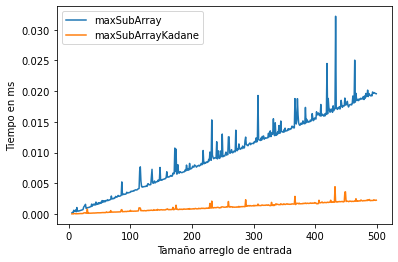

In [113]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
z=[]; w=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  low = 0
  high = len(a) - 1
  largo = len(a)

  #La función repeat está ejecutando 20 veces maxSubArray y maxSubArrayKadane con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a}, {low}, {high})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import maxSubArrayKadane", stmt=f"maxSubArrayKadane({a}, {largo})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  z.append(n)
  w.append(t2)


plt.plot(x,y)
plt.plot(z,w)
plt.legend(["maxSubArray", "maxSubArrayKadane"])

plt.xlabel('Tamaño arreglo de entrada')
plt.ylabel('Tiempo en ms')
plt.show()

## Análisis de resultados

En el gráfico se puede apreciar que, pese a que ambos algoritmos son eficientes, el algoritmo de Kadane lo es más, esto debido a que su tiempo de ejecución es de $O(n)$, a diferencia del tiempo de ejecución del *MaxSubArray* implementado con "divide y vencerás", que tiene un tiempo de $O(n log n)$. Para visualizar esto se puede apreciar el caso en el que el arreglo de entrada es de tamaño n = 500, ya que el algoritmo de Kadane demora aproximadamente 0,003 ms en encontrar el máximo sub arreglo, mientras que el *MaxSubArray* demora 0,02 ms aproximadamente.

## 5.2 Valor máximo retornado por el algoritmo MaxSubArray

El gráfico que se muestra a continuación tiene la función de probar la siguiente hipótesis: "Mientras mayor sea el tamaño del arreglo de entrada, mayor será la suma que el algoritmo retorna". Los casos de pruebas son para problemas de tamaños con n ∈ [5, 999]. 

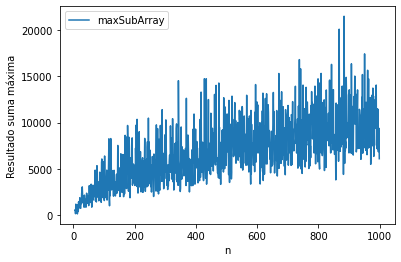

In [110]:
import math

x=[n for n in range(5,1000)] 
y=[]; 

for n in range(5,1000):
  a = random.sample(range(-500, 500), n)
  a, i, j = maxSubArray(a, 0, len(a) - 1)
  y.append(a)

plt.plot(x,y)
plt.legend(["maxSubArray"])

plt.xlabel('n')
plt.ylabel('Resultado suma máxima')
plt.show()

## Análisis de resultados

Como se puede ver en el gráfico anterior, la hipótesis planteada es érronea, ya que el gráfico varía constantemente en los resultados que el algoritmo arroja. Y pese a que el gráfico aumenta su base a medida que el tamaño de entrada aumenta, esto no es una prueba suficiente para encontrar alguna relación contundente que respalde la hipótesis, ya que igualmente se puede ver que aunque el gráfico suba lentamente, este igual sufre de resultados con sumas menores en los niveles de entrada mayores. Se puede concluir que no existe una relación lo suficientemente fuerte entre un mayor tamaño de arreglo de entrada con una mayor suma retornada.